In [1]:
#### Load multiple time series
# import all modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline
fig1 = plt.figure(figsize=(2, 2), dpi=100)
%config InlineBackend.figure_format = 'retina'
import datetime
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator
# Import data
print("Reading in data...")
df1= pd.read_csv("C:/Users/fahmida/Desktop/Rental/airbnb/calendar/calendar_april_2018.csv.gz")
df= pd.concat([df1])
print(df.head(5))
# Check the type of each column in your DataFrame
print(df.dtypes)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\ProgramData\Anaconda2\lib\runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "C:\ProgramData\Anaconda2\lib\runpy.py", line 72, in _run_code
    exec code in run_globals
  File "C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda2\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "

Reading in data...
   listing_id        date available price
0    24084526  2019-04-08         f   NaN
1    24084526  2019-04-07         f   NaN
2    24084526  2019-04-06         f   NaN
3    24084526  2019-04-05         f   NaN
4    24084526  2019-04-04         f   NaN
listing_id     int64
date          object
available     object
price         object
dtype: object


<Figure size 200x200 with 0 Axes>

In [2]:
df=df.drop_duplicates(['date','price'],keep='last')
# Change Dates to consistent format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
print(df.head(10))
df=df.set_index('date')

       listing_id       date available    price
53655    19574238 2019-04-08         t  $430.00
53656    19574238 2019-04-07         t  $430.00
53659    19574238 2019-04-04         t  $430.00
53660    19574238 2019-04-03         t  $430.00
53661    19574238 2019-04-02         t  $430.00
53662    19574238 2019-04-01         t  $430.00
53663    19574238 2019-03-31         t  $430.00
53666    19574238 2019-03-28         t  $430.00
53667    19574238 2019-03-27         t  $430.00
53668    19574238 2019-03-26         t  $430.00


In [3]:
df['price'] = (df['price'].str.replace(r'[^-+\d.]', '').astype(float))
df= df[df['price'] < 2000]
df = df[df['available']=='t']

In [4]:
mean_price = df.groupby(df.index).mean().drop(columns='listing_id')

                 price
date                  
2018-04-09  262.332180
2018-04-10  280.438650
2018-04-11  288.648810
2018-04-12  294.158358
2018-04-13  310.902703
2018-04-14  304.915068
2018-04-15  293.507123
2018-04-16  296.011204
2018-04-17  294.552778
2018-04-18  295.389356
2018-04-19  295.485014
2018-04-20  307.947781
2018-04-21  310.311688
2018-04-22  300.223720
2018-04-23  303.272973
2018-04-24  303.021390
2018-04-25  304.578804
2018-04-26  302.618919
2018-04-27  320.953804
2018-04-28  323.112000
2018-04-29  304.158311
2018-04-30  301.394737
2018-05-01  309.091603
2018-05-02  310.554987
2018-05-03  310.114428
2018-05-04  315.754522
2018-05-05  314.685279
2018-05-06  316.105793
2018-05-07  324.766110
2018-05-08  326.455189
...                ...
2019-03-10  310.042553
2019-03-11  310.908235
2019-03-12  310.733021
2019-03-13  311.000000
2019-03-14  310.035461
2019-03-15  333.638826
2019-03-16  333.568233
2019-03-17  309.606635
2019-03-18  311.259434
2019-03-19  311.360849
2019-03-20 

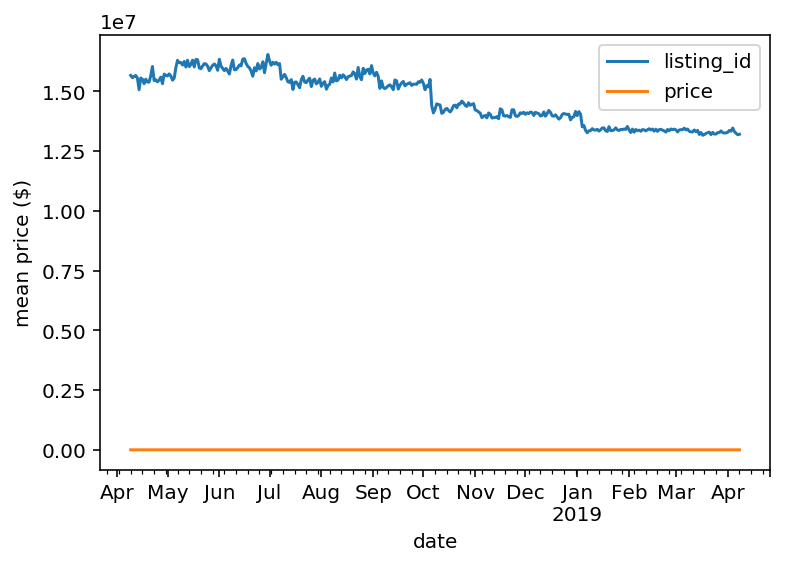

In [5]:
mean_price1 = df.groupby(df.index).mean()
mean_price1.plot()
ax = plt.ylabel('mean price ($)')
print(mean_price)

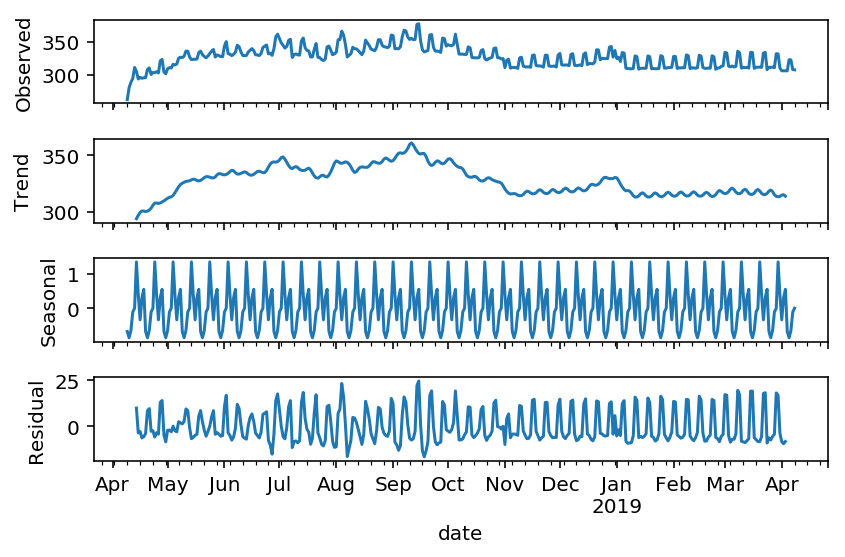

In [6]:
from dateutil.relativedelta import relativedelta
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(mean_price,freq=10) 
decomposition.plot()
plt.show()

In [7]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

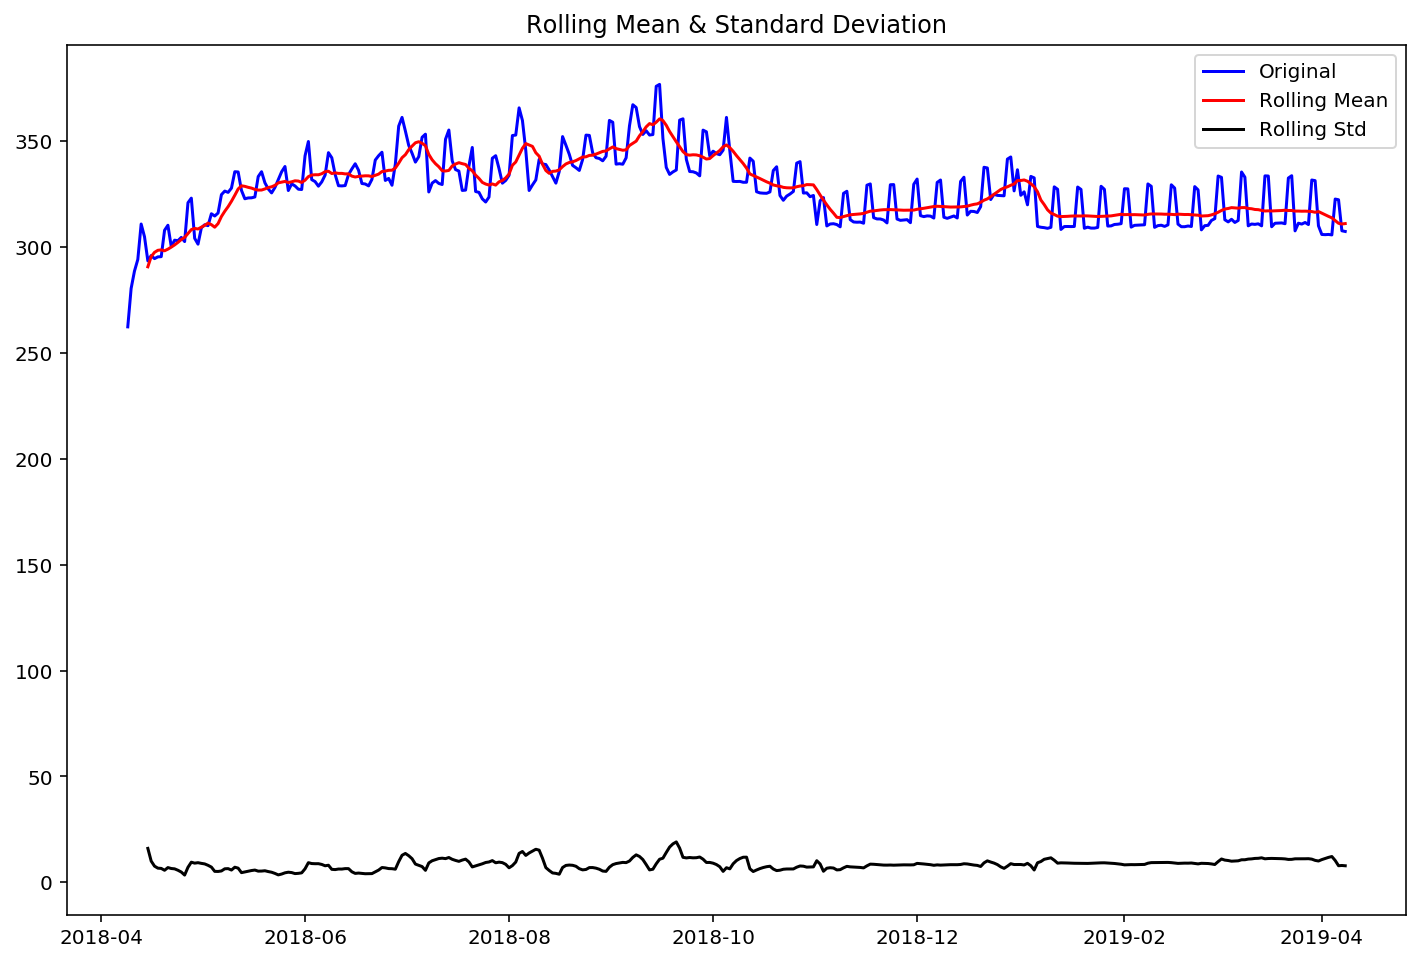

Results of Dickey-Fuller Test:
Test Statistic                  -1.839723
p-value                          0.360926
#Lags Used                      14.000000
Number of Observations Used    350.000000
Critical Value (5%)             -2.869833
Critical Value (1%)             -3.449173
Critical Value (10%)            -2.571188
dtype: float64


In [8]:
test_stationarity(mean_price.price)

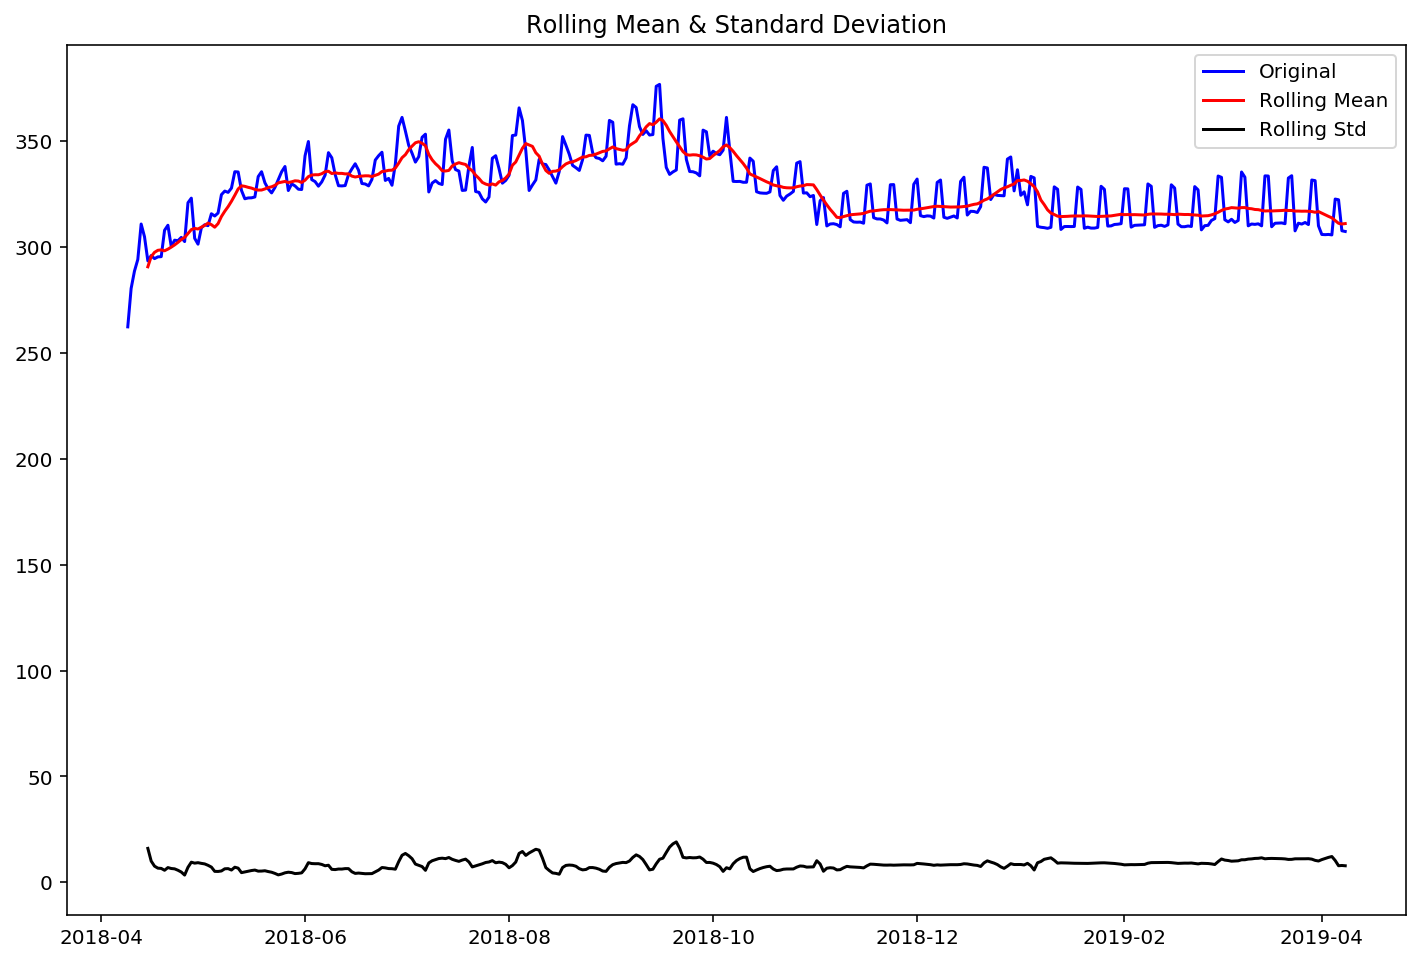

Results of Dickey-Fuller Test:
Test Statistic                  -1.839723
p-value                          0.360926
#Lags Used                      14.000000
Number of Observations Used    350.000000
Critical Value (5%)             -2.869833
Critical Value (1%)             -3.449173
Critical Value (10%)            -2.571188
dtype: float64


In [9]:
test_stationarity(mean_price.price)

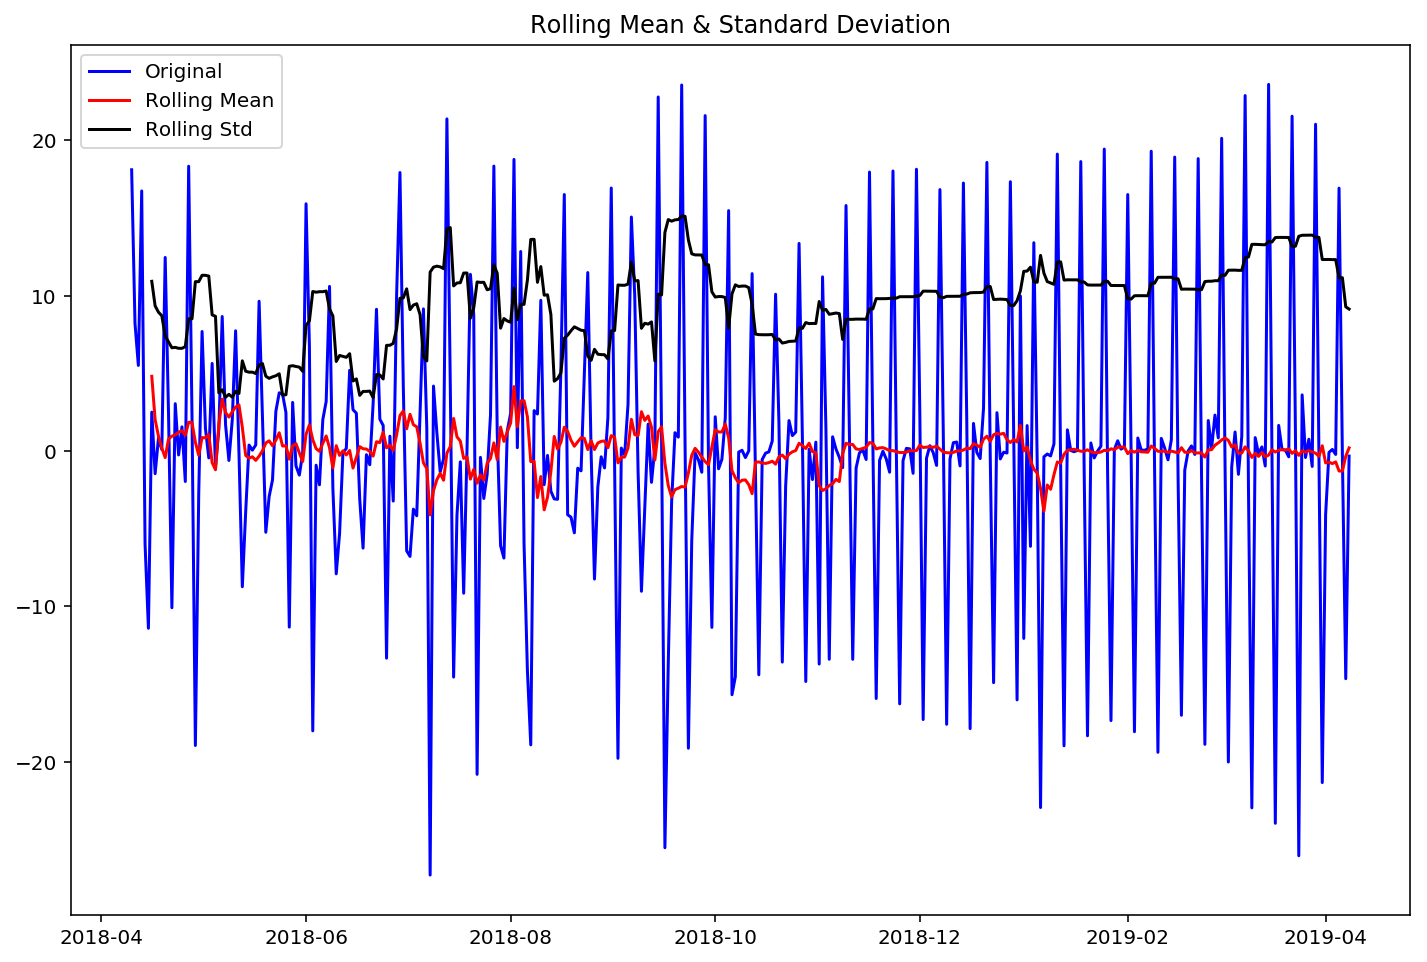

Results of Dickey-Fuller Test:
Test Statistic                -6.044503e+00
p-value                        1.321729e-07
#Lags Used                     1.300000e+01
Number of Observations Used    3.500000e+02
Critical Value (5%)           -2.869833e+00
Critical Value (1%)           -3.449173e+00
Critical Value (10%)          -2.571188e+00
dtype: float64


In [10]:
price_diff = mean_price.diff().dropna()
test_stationarity(price_diff.price)

In [11]:
def model_run_validate(parameter):

    mod = sm.tsa.statespace.SARIMAX(mean_price,
                                    order=(parameter[0], parameter[1], parameter[2]),
                                    seasonal_order=(parameter[3], parameter[4], parameter[5], parameter[6]),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

    results = mod.fit(maxiter=200)

    print(results.summary().tables[1])

    results.plot_diagnostics(figsize=(15, 12))

    pred_start_date = '2019-04-08 '
    pred_dynamic = results.get_prediction(start=(pred_start_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()

    ax = mean_price.plot(label='Observed', figsize=(20, 15))
    pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

    ax.fill_betweenx(ax.get_ylim(), (pred_start_date), mean_price.index[-1],
                     alpha=.1, zorder=-1)

    ax.set_xlabel('Date')
    ax.set_ylabel('Mean Price ($)')
    ax.legend()

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1113      0.169      0.659      0.510      -0.220       0.442
ma.L1         -0.3904      0.155     -2.514      0.012      -0.695      -0.086
ma.L2         -0.3397      0.086     -3.947      0.000      -0.508      -0.171
ar.S.L12      -0.3457      0.254     -1.359      0.174      -0.844       0.153
ar.S.L24      -0.2416      0.103     -2.354      0.019      -0.443      -0.040
ma.S.L12      -0.9867    970.772     -0.001      0.999   -1903.665    1901.691
ma.S.L24      -0.0133     12.796     -0.001      0.999     -25.092      25.066
sigma2        58.8878   5.72e+04      0.001      0.999   -1.12e+05    1.12e+05


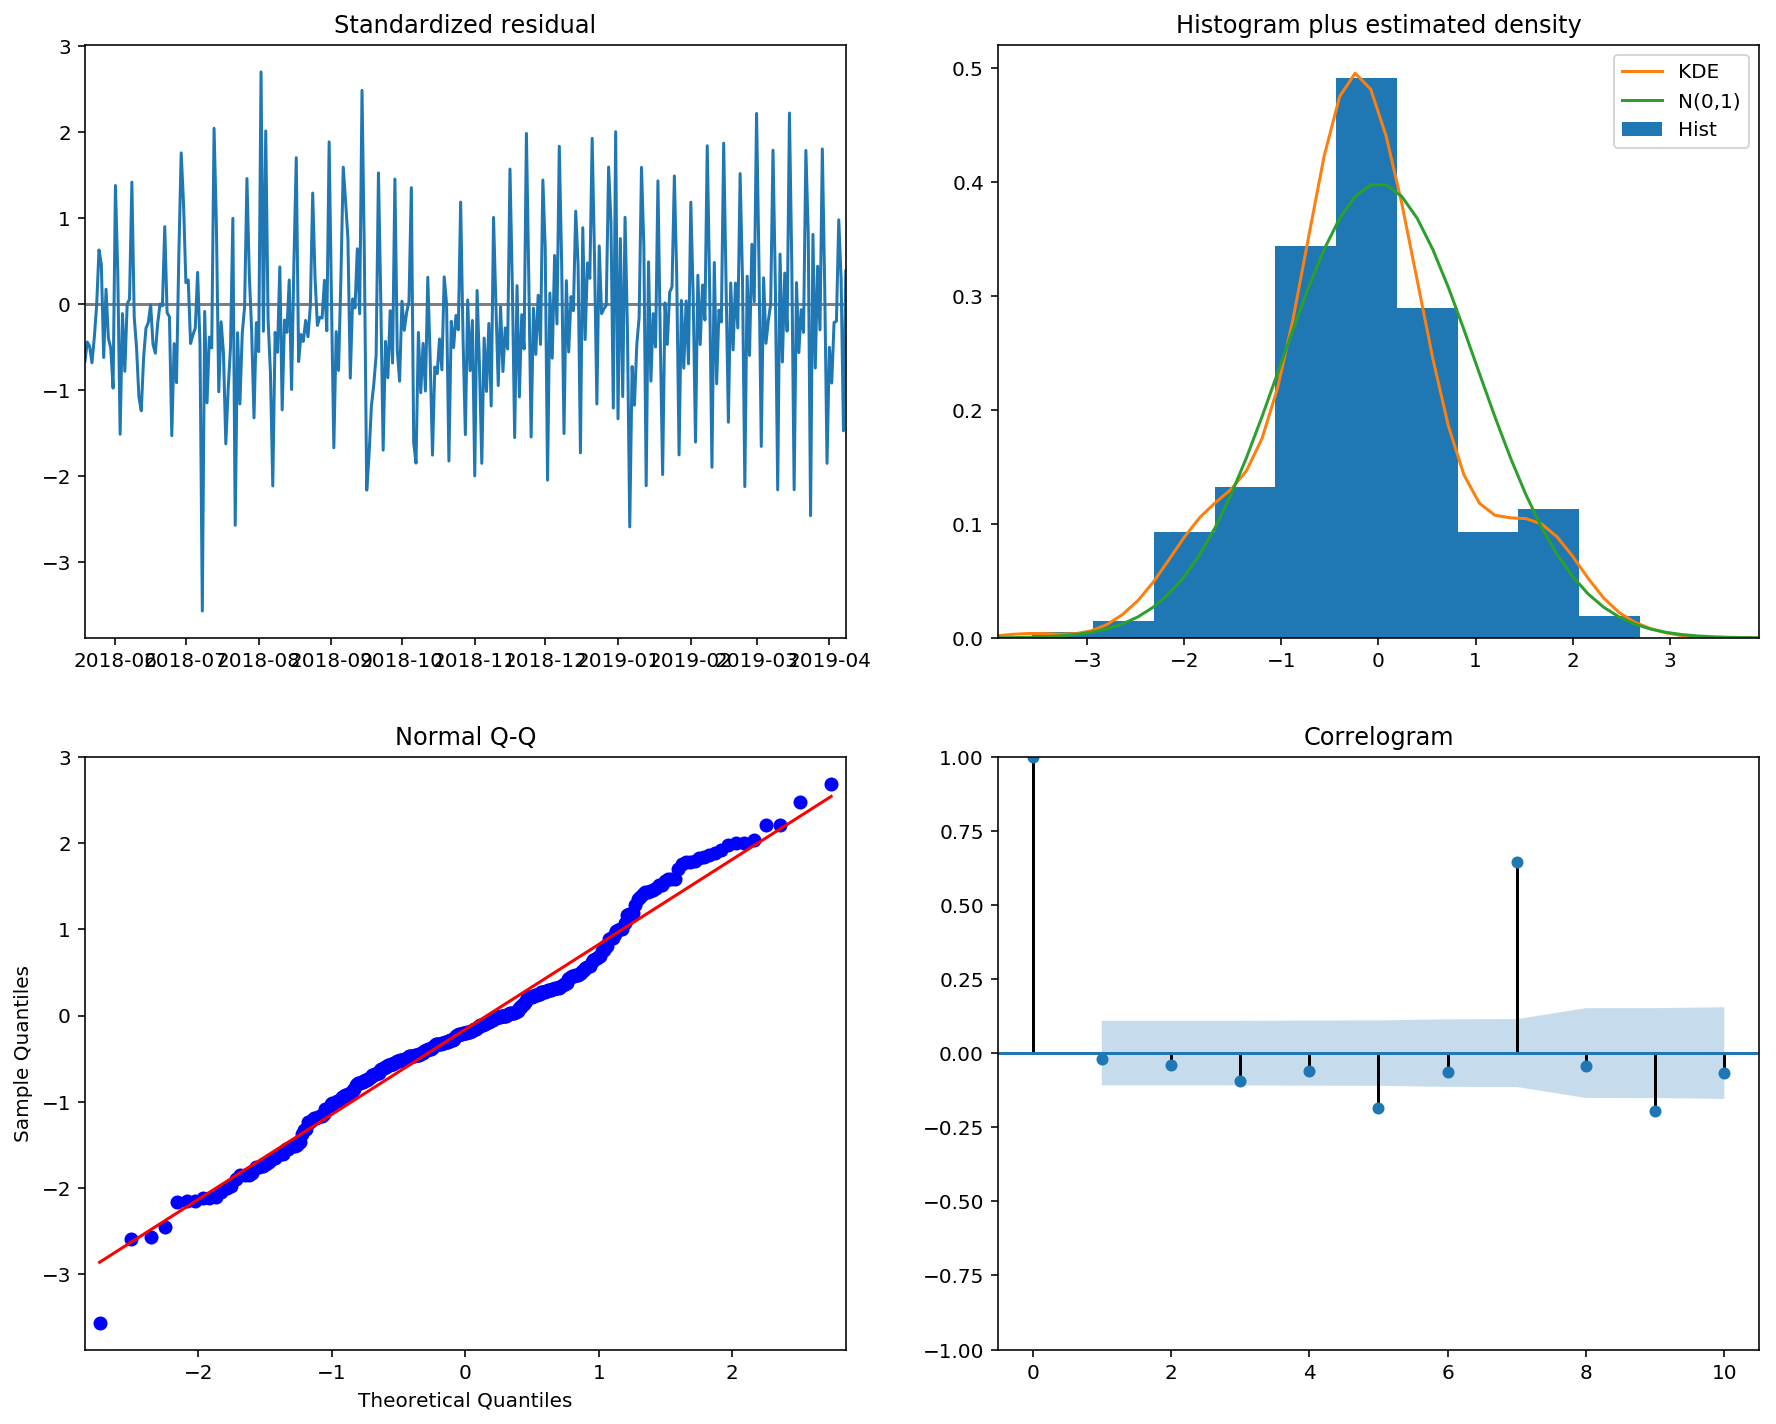

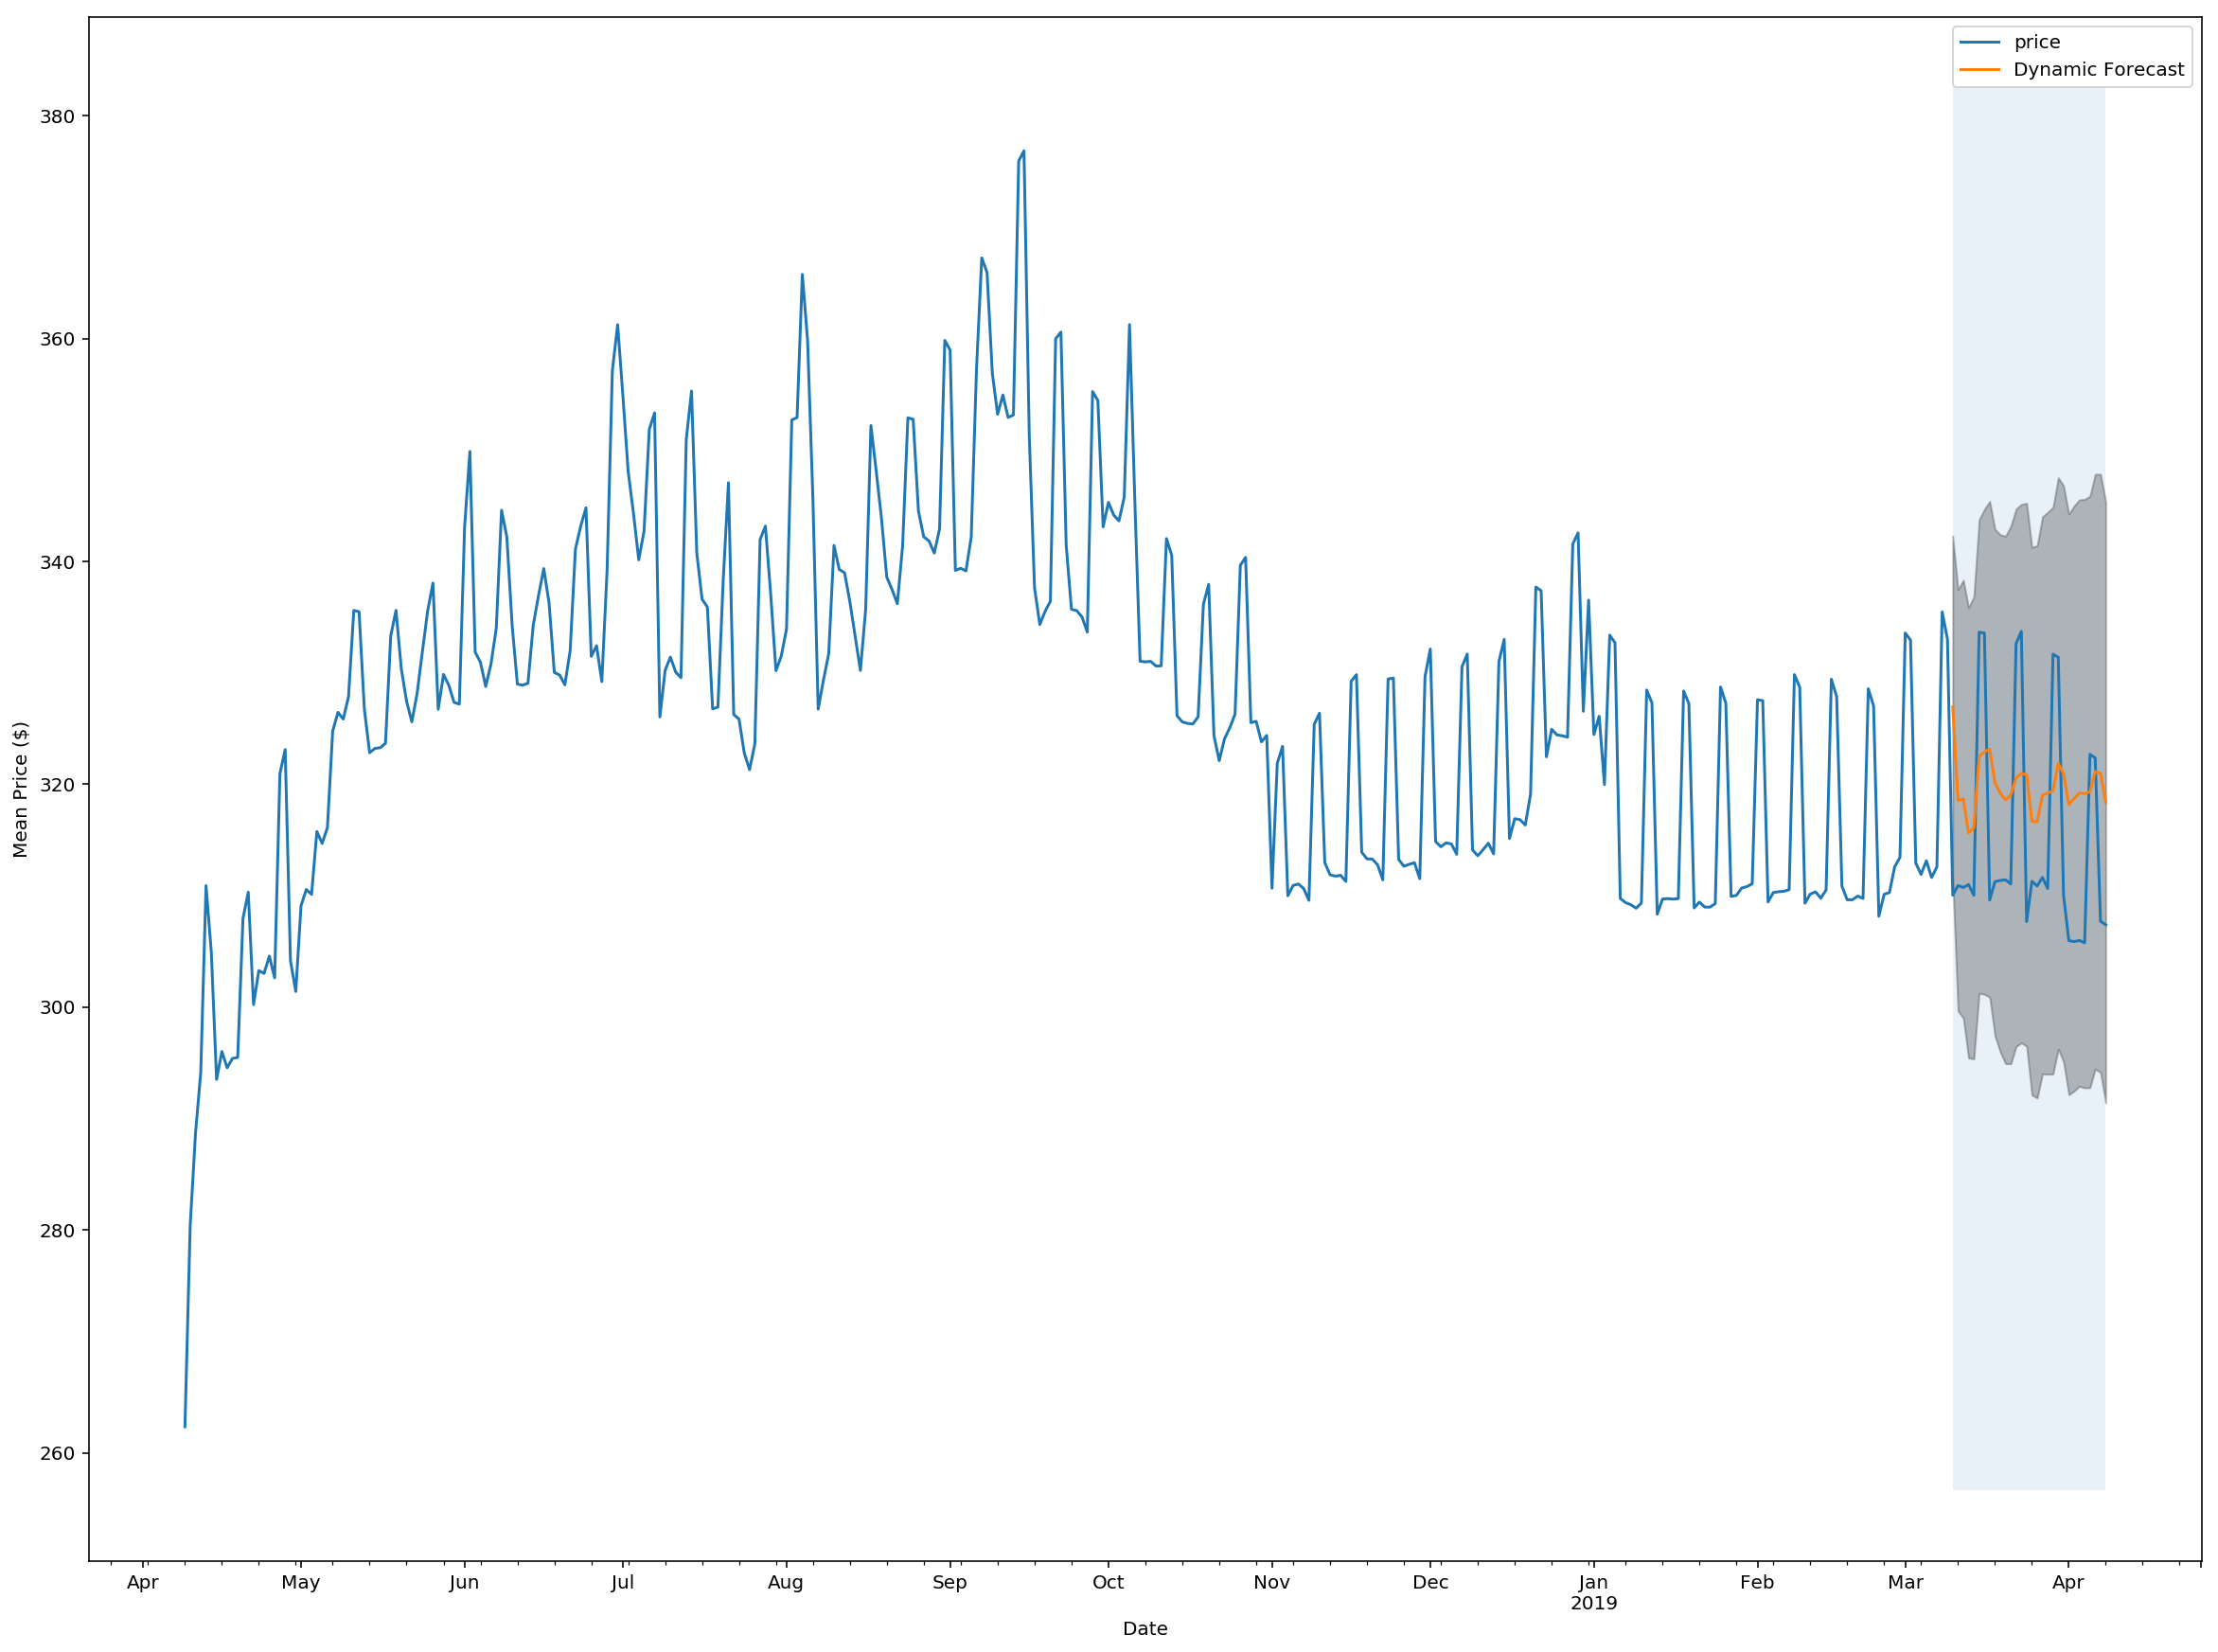

In [12]:
#SARIMA(1, 1, 2)x(2, 1, 2, 12) - AIC:8313.5104141
parameter = [1,1,2,2,1,2,12]
model_run_validate(parameter)

NameError: name 'parameter_search_sarimax' is not defined

In [16]:
def run_model_forecast(parameter):
    
    mod = sm.tsa.statespace.SARIMAX(mean_price,
                                    order=(parameter[0], parameter[1], parameter[2]),
                                    seasonal_order=(parameter[3], parameter[4], parameter[5], parameter[6]),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

    results = mod.fit(maxiter=200)
    
    pred_uc = results.get_forecast(steps=240)
    pred_ci = pred_uc.conf_int()
    
    ax = mean_price.price.plot(label='Observed', figsize=(20, 15))
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel('Mean Price ($)')
    ax.legend()

C:\ProgramData\Anaconda2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


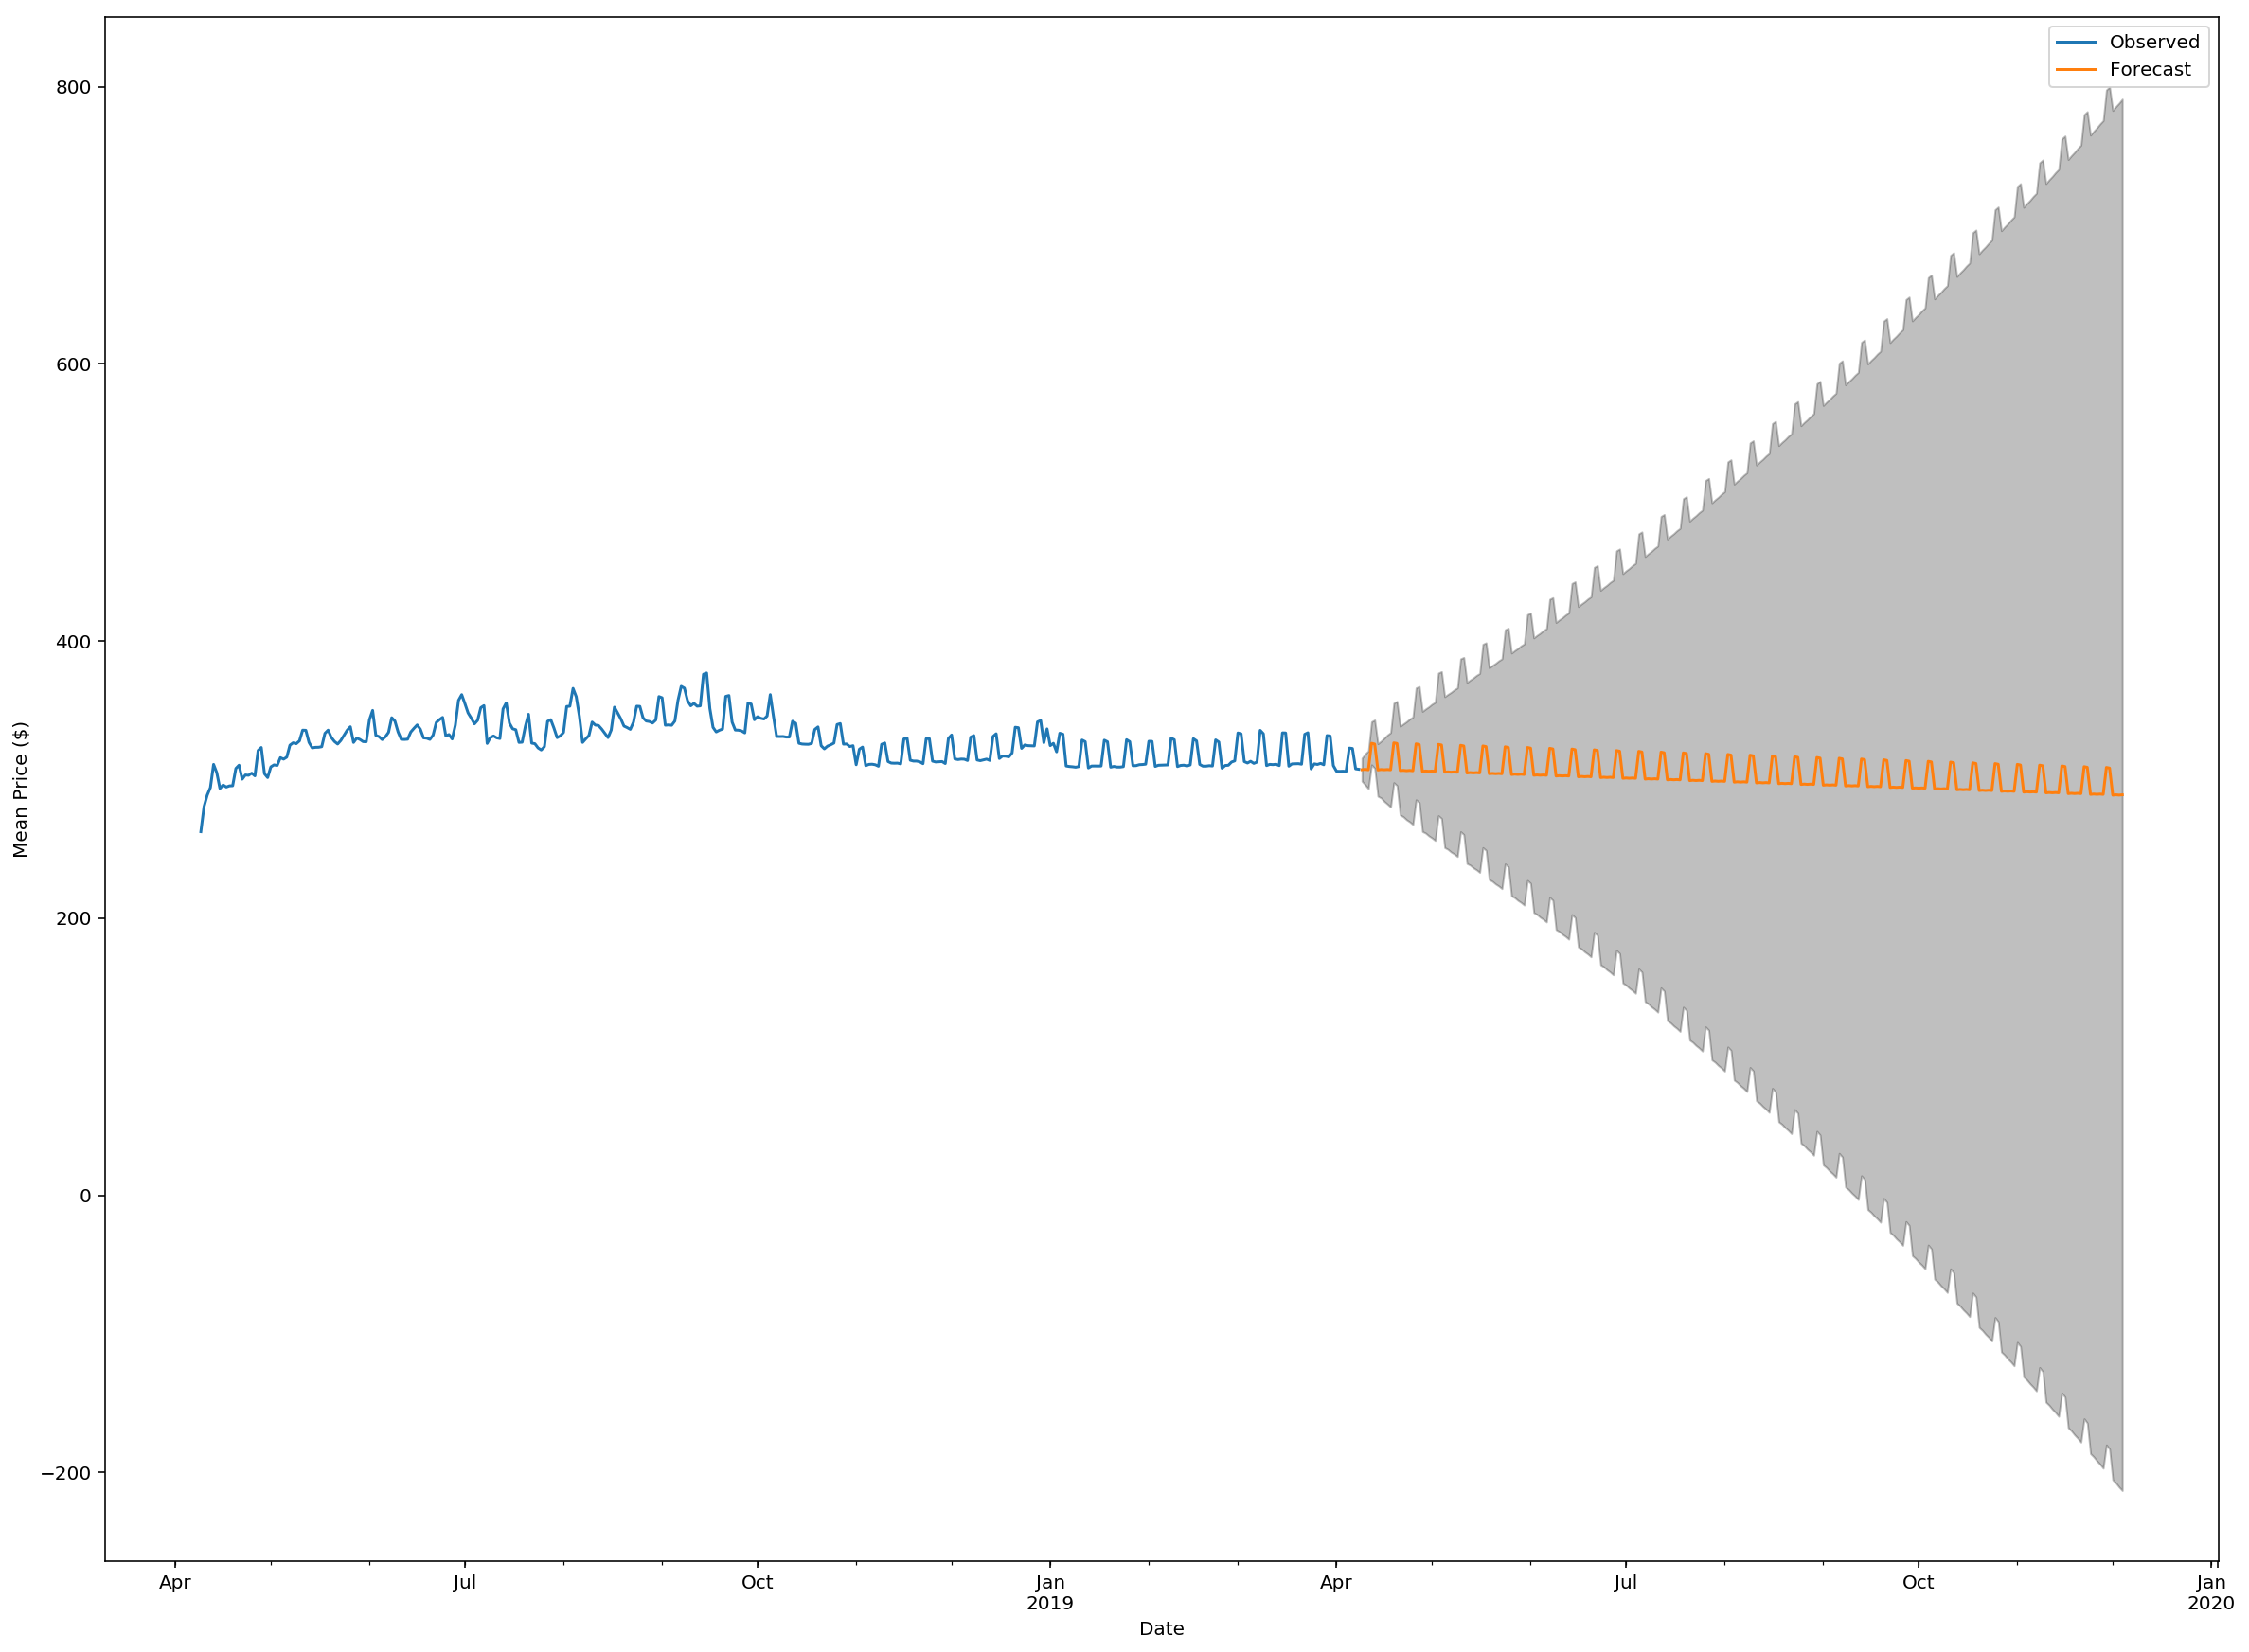

In [17]:
parameter = [2,1,1,2,1,2,7]
run_model_forecast(parameter)

In [ ]:
parameter = [0,1,2,2,1,2,7]
run_model_forecast(parameter)

In [ ]:
from sklearn.svm import LinearSVC
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import datetime
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator
matplotlib.use('agg')
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
y_airbnb = df['price']
y_airbnb.plot(figsize=(15, 6))
plt.show()

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
mod = sm.tsa.statespace.SARIMAX(y_airbnb,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
#Validating Forecast
pred = results.get_prediction(start='2019-04-07', dynamic=False)

pred_ci = pred.conf_int()
ax = y_airbnb['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('AirBnB Price Per Night')
plt.legend()
plt.show()

In [ ]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure()
pyplot.subplot(211)
plot_acf(df.price, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(df.price, ax=pyplot.gca())
pyplot.show()